In [119]:
from typing import List, Tuple

from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import graphviz

In [112]:
def extract_cathdb_training_data(gcf_names: List[str]) -> Tuple[np.ndarray, np.ndarray]:
    num_categories = len(gcf_names)
    num_total_examples = len(gcf)
    indices = np.zeros((num_categories, num_total_examples))
    
    for i, name in enumerate(gcf_names):
        cur_idx = gcf['GCF'] == name
        indices[i] = cur_idx
        print(f'Family is {name}, Number of Examples {np.sum(cur_idx)}')
    full_idx = np.logical_or.reduce(indices)
    subset = gcf[full_idx]
    subset = subset.reset_index(drop=True)
    features = subset.iloc[:, 5:194].to_numpy() # CATHDB Specific
    
    label_map = {name: i for i, name in enumerate(gcf_names)}
    labels = np.array([label_map[lab] for lab in subset['GCF']])
    
    if len(gcf_names) == 2:
        labels[labels == 0] = -1

    return features, labels

In [92]:
gcf = pd.read_csv('data/cathdb/gcfs_cathdb.tsv', sep='\t')

In [110]:
features, labels = extract_cathdb_training_data(['Lant_31', 'sidero_60'])

Family is Lant_31, Number of Examples 261
Family is sidero_60, Number of Examples 117


In [152]:
clf = tree.DecisionTreeClassifier(max_depth = 2)

In [153]:
clf.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

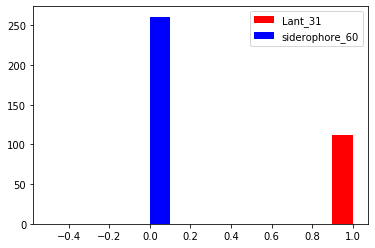

In [157]:
column = features[:, 36]
plt.hist(column[labels == 1], color='red', label='Lant_31')
plt.hist(column[labels == 0], color='blue', label='siderophore_60')
plt.legend()
plt.show()

In [ ]:
cathdb_names = gcf.columns[4:194]

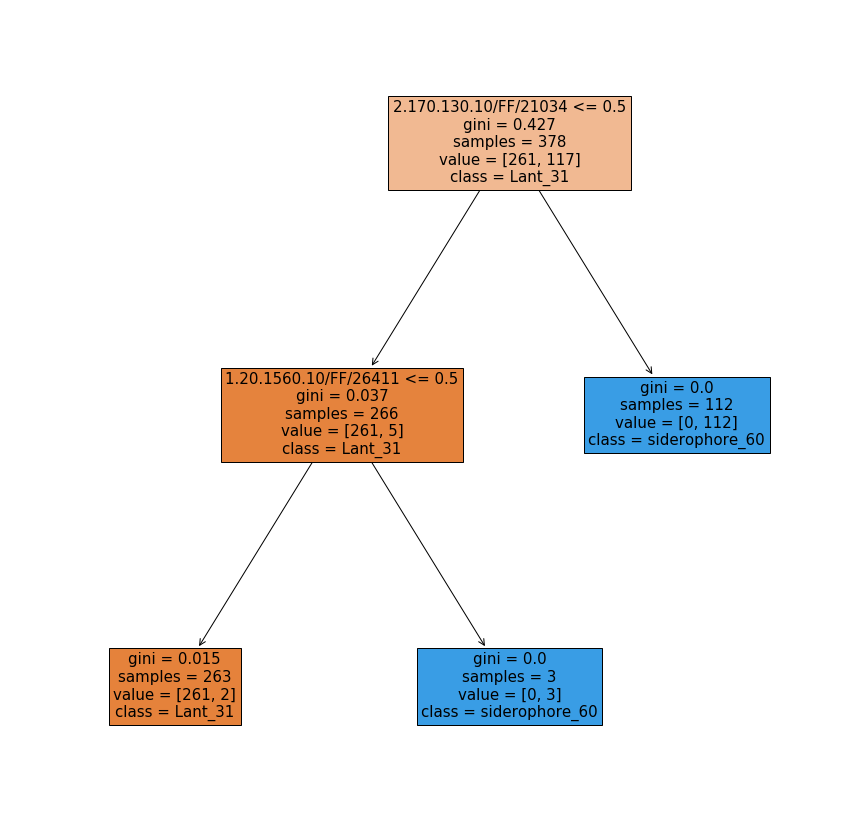

In [156]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf,
               feature_names = cathdb_names,
               filled=True,
               class_names=['Lant_31', 'siderophore_60'],
               fontsize=15)
plt.show()